[[ 0.46143025  1.2424006  -0.09497519  0.63289815]
 [-0.42124137 -1.4856497   0.11987232  0.46437708]
 [-0.7157399  -0.9097515   1.3189371   0.9596154 ]
 [ 0.5612376   0.4969097   0.29132348  0.06159272]]


Text(0.5, 1.0, 'input')

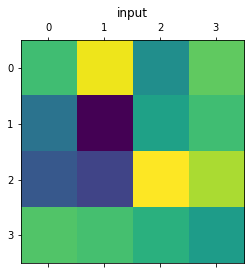

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

N = 4
A = np.random.randn(N, N).astype(np.float32)

print(A)
plt.matshow(A)
plt.title('input')

In [2]:
dA = cuda.mem_alloc(A.nbytes)
cuda.memcpy_htod(dA, A)

mod = SourceModule("""
  __global__ void inv(float *a)
  {
    int idx = threadIdx.x + threadIdx.y*4;
    a[idx] *= -1.0f;
  }
  """)

func = mod.get_function("inv")
func(dA, block=(4,4,1))

A0 = -A
A1 = np.empty_like(A)
cuda.memcpy_dtoh(A1, dA)
print(A1)

[[-0.46143025 -1.2424006   0.09497519 -0.63289815]
 [ 0.42124137  1.4856497  -0.11987232 -0.46437708]
 [ 0.7157399   0.9097515  -1.3189371  -0.9596154 ]
 [-0.5612376  -0.4969097  -0.29132348 -0.06159272]]


err=0.0


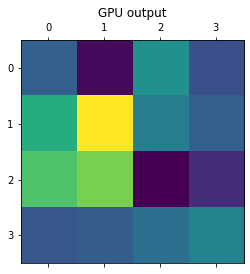

In [3]:
plt.matshow(A1)
plt.title('GPU output')
err = np.linalg.norm(A1 - A0)
print(f'{err=}')